1. Model Training 



In [76]:
# importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Modeling 
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from scipy import stats
import warnings

2. Importing CSV data as pandas DataFrame

In [77]:
df=pd.read_csv('World Happiness Report 2024.csv')

In [78]:
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919


In [79]:
# Checking missing Data
df.isnull().mean()*100


Country name                        0.000000
year                                0.000000
Life Ladder                         0.000000
Log GDP per capita                  1.184934
Social support                      0.550148
Healthy life expectancy at birth    2.666102
Freedom to make life choices        1.523487
Generosity                          3.427846
Perceptions of corruption           5.289886
Positive affect                     1.015658
Negative affect                     0.677105
dtype: float64

In [80]:
df.shape

(2363, 11)

In [81]:
df.shape

(2363, 11)

3. Handling Missing Values

In [82]:
columns_to_impute = df.iloc[:, 3:11]
data_imputer = SimpleImputer(strategy='mean') 
imp_data=data_imputer.fit_transform(columns_to_impute)
df.iloc[:, 3:11]=imp_data
print(df)


     Country name  year  Life Ladder  Log GDP per capita  Social support  \
0     Afghanistan  2008     3.723590            7.350416        0.450662   
1     Afghanistan  2009     4.401778            7.508646        0.552308   
2     Afghanistan  2010     4.758381            7.613900        0.539075   
3     Afghanistan  2011     3.831719            7.581259        0.521104   
4     Afghanistan  2012     3.782938            7.660506        0.520637   
...           ...   ...          ...                 ...             ...   
2358     Zimbabwe  2019     2.693523            7.697755        0.759162   
2359     Zimbabwe  2020     3.159802            7.596050        0.717243   
2360     Zimbabwe  2021     3.154578            7.656878        0.685151   
2361     Zimbabwe  2022     3.296220            7.670073        0.666172   
2362     Zimbabwe  2023     3.572386            7.678590        0.693817   

      Healthy life expectancy at birth  Freedom to make life choices  \
0              

3.1 Encoding Categorical features

In [83]:
data_label_encoder = LabelEncoder()
df['Country name']=data_label_encoder.fit_transform(df['Country name'])
print(df)

      Country name  year  Life Ladder  Log GDP per capita  Social support  \
0                0  2008     3.723590            7.350416        0.450662   
1                0  2009     4.401778            7.508646        0.552308   
2                0  2010     4.758381            7.613900        0.539075   
3                0  2011     3.831719            7.581259        0.521104   
4                0  2012     3.782938            7.660506        0.520637   
...            ...   ...          ...                 ...             ...   
2358           164  2019     2.693523            7.697755        0.759162   
2359           164  2020     3.159802            7.596050        0.717243   
2360           164  2021     3.154578            7.656878        0.685151   
2361           164  2022     3.296220            7.670073        0.666172   
2362           164  2023     3.572386            7.678590        0.693817   

      Healthy life expectancy at birth  Freedom to make life choices  \
0  

In [84]:
# checking if all missing values filled
df.isnull().mean()*100

Country name                        0.0
year                                0.0
Life Ladder                         0.0
Log GDP per capita                  0.0
Social support                      0.0
Healthy life expectancy at birth    0.0
Freedom to make life choices        0.0
Generosity                          0.0
Perceptions of corruption           0.0
Positive affect                     0.0
Negative affect                     0.0
dtype: float64

4. Feature Scaling -Standardization

In [85]:
data_scaler=StandardScaler()
standardized_data =data_scaler.fit_transform(df)
standardized_data=pd.DataFrame(standardized_data, columns=df.columns)
print(standardized_data)
print(data_scaler)


      Country name      year  Life Ladder  Log GDP per capita  Social support  \
0        -1.734962 -1.337163    -1.564024           -1.789789       -2.968173   
1        -1.734962 -1.139471    -0.961343           -1.651593       -2.127087   
2        -1.734962 -0.941778    -0.644443           -1.559666       -2.236588   
3        -1.734962 -0.744086    -1.467934           -1.588174       -2.385297   
4        -1.734962 -0.546394    -1.511284           -1.518961       -2.389159   
...            ...       ...          ...                 ...             ...   
2358      1.695045  0.837452    -2.479407           -1.486428       -0.415444   
2359      1.695045  1.035145    -2.065042           -1.575256       -0.762314   
2360      1.695045  1.232837    -2.069684           -1.522129       -1.027866   
2361      1.695045  1.430529    -1.943813           -1.510605       -1.184907   
2362      1.695045  1.628222    -1.698393           -1.503167       -0.956150   

      Healthy life expectan

5. For Visualizing Outliers with Boxplots

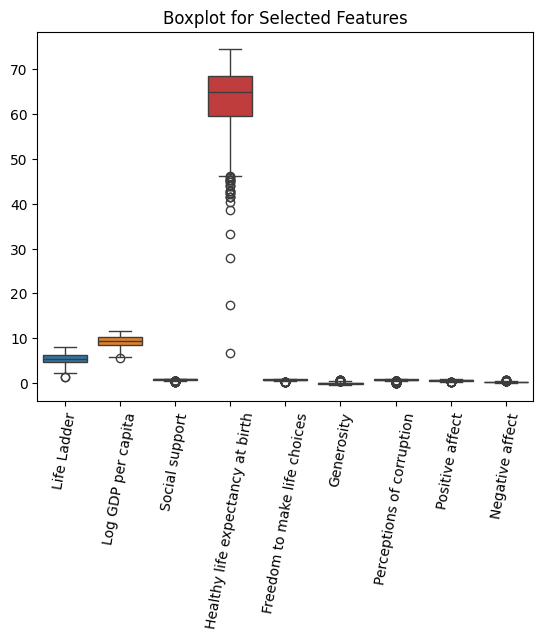

In [86]:
numeric_columns = ['Life Ladder', 'Log GDP per capita', 'Social support', 
                   'Healthy life expectancy at birth', 'Freedom to make life choices', 
                   'Generosity', 'Perceptions of corruption','Positive affect', 'Negative affect']

sns.boxplot(data=df[numeric_columns])
plt.title('Boxplot for Selected Features')
plt.xticks(rotation=80)
plt.show()

Key Observations:
* Life Ladder, Log GDP per Capita, Social Support: These features appear to have a more spread-out range, with some outliers present.
* Healthy Life Expectancy at Birth: This feature has a wide spread and some significant outliers.
* Generosity, Perceptions of corruption,Positive Affect, Negative Affect: These features seem to have values clustered near 0, with few or no significant outliers.


5.1 Using Interquartile Range (IQR) method to detect outliers

In [87]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
data_outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
print(data_outliers.sum())

Country name                          0
year                                  0
Life Ladder                           2
Log GDP per capita                    1
Social support                       50
Healthy life expectancy at birth     27
Freedom to make life choices         16
Generosity                           44
Perceptions of corruption           227
Positive affect                       9
Negative affect                      31
dtype: int64


5.2 Removing Outliers

In [88]:
# Calculate the Q1 (25th percentile) and Q3 (75th percentile) for each feature
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# removing the outliers using the IQR method (values outside 1.5 * IQR from Q1 and Q3)
df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Display the shape of the dataset after removing the outliers
print(f"Original dataset shape: {df.shape}")
print(f"Dataset shape after removing outliers: {df_no_outliers.shape}")

# Optional: Check a few rows of the cleaned dataset
print(df_no_outliers.head())


Original dataset shape: (2363, 11)
Dataset shape after removing outliers: (1983, 11)
   Country name  year  Life Ladder  Log GDP per capita  Social support  \
1             0  2009     4.401778            7.508646        0.552308   
2             0  2010     4.758381            7.613900        0.539075   
3             0  2011     3.831719            7.581259        0.521104   
4             0  2012     3.782938            7.660506        0.520637   
6             0  2014     3.130896            7.670638        0.525568   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
1                         50.799999                      0.678896    0.187297   
2                         51.099998                      0.600127    0.117861   
3                         51.400002                      0.495901    0.160098   
4                         51.700001                      0.530935    0.234157   
6                         52.299999                      0.508514

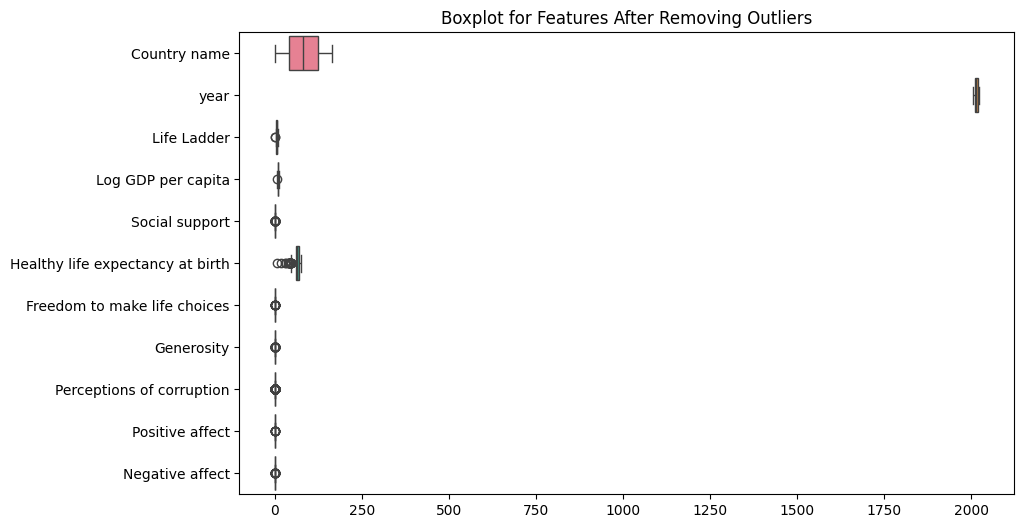

In [89]:
df_numerical = df.drop(columns=['Country name', 'year'])

df_cleaned = pd.concat([df[['Country name', 'year']], df_numerical], axis=1)

# Ploting the boxplot for the cleaned data
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, orient='h')
plt.title("Boxplot for Features After Removing Outliers")
plt.show()



5.3 Applying Winsorizing 

* on Life Ladder,Log GDP per capita, Healthy life expectancy at birth to limit the effect of remaining outliers
* It replace the extreme values with a specified percentile value ((e.g., 1%, 5%, 10%))

In [90]:
from scipy.stats import mstats

df['Life Ladder'] = mstats.winsorize(df['Life Ladder'], limits=[0.05, 0.05])
df['Log GDP per capita'] = mstats.winsorize(df['Log GDP per capita'], limits=[0.05, 0.05])
df['Healthy life expectancy at birth'] = mstats.winsorize(df['Healthy life expectancy at birth'], limits=[0.05, 0.05])



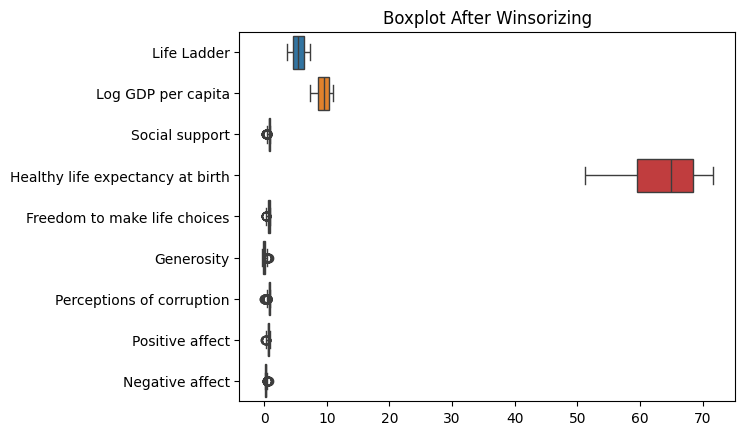

In [91]:
numerical_features = df.drop(columns=['Country name', 'year'])
sns.boxplot(data=numerical_features, orient='h')
plt.title("Boxplot After Winsorizing")
plt.show()


In [92]:
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(df.drop(columns=['Country name', 'year']))

6. Preparing X, and Y variables

In [93]:
X = df.drop('Life Ladder', axis=1)
y = df['Life Ladder']

6.1 Combining All Transformations into a Pipeline

In [94]:

numeric_features = [
    'year', 'Log GDP per capita', 'Social support', 
    'Healthy life expectancy at birth', 'Freedom to make life choices',
    'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect'
]
categorical_features = ['Country name']

# Defining the transformations for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())  # Standardize the numeric features
])

# Define the transformations for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),  # Impute missing values with 'missing'
    ('encoder', OneHotEncoder())  # One-hot encode categorical features
])

# Combine both numeric and categorical transformers into a single preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),  
        ('cat', categorical_transformer, categorical_features) 
    ]
)

# Apply the transformations to dataset (X)
X_transformed = preprocessor.fit_transform(X)


7.  Splitting the Data into Training and Testing Sets:

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((1890, 174), (473, 174))

8. Model Selection
* Creating and evaluate Function to give all metrics after model Training

In [96]:
def evaluate_model(true, predicted):
    mae=mean_absolute_error(true, predicted)
    mse=mean_squared_error(true, predicted)
    rmse=np.sqrt(mse)
    r2_square=r2_score(true, predicted)

    return mae,rmse,r2_square

In [97]:
models={
    "LinearRegression" : LinearRegression(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "K-Neighbors Regressor" : KNeighborsRegressor(),
    "XGBRegressor" : XGBRegressor(),
    "AdaBoostRegressor" : AdaBoostRegressor()

}
model_list=[]
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # train model

    # Make Predictions
    y_train_pred= model.predict(X_train)
    y_test_pred =model.predict(X_test)

    # Evaluate Train and Test Dataset
    model_train_mae,model_train_rmse,model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae,model_test_rmse,model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance of Training set')
    print("- Root Mean squared Error: {:.4f}".format( model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format( model_train_mae))
    print("- R2 Score: {:.4f}".format( model_train_r2))

    print('....................')


    print('Model performance of Test set')
    print("- Root Mean squared Error: {:.4f}".format( model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')



LinearRegression
Model performance of Training set
- Root Mean squared Error: 0.3215
- Mean Absolute Error: 0.2428
- R2 Score: 0.9102
....................
Model performance of Test set
- Root Mean squared Error: 0.3690
- Mean Absolute Error: 0.2756
- R2 Score: 0.8788


Random Forest Regressor
Model performance of Training set
- Root Mean squared Error: 0.1287
- Mean Absolute Error: 0.0966
- R2 Score: 0.9856
....................
Model performance of Test set
- Root Mean squared Error: 0.3510
- Mean Absolute Error: 0.2612
- R2 Score: 0.8903


K-Neighbors Regressor
Model performance of Training set
- Root Mean squared Error: 0.2602
- Mean Absolute Error: 0.1901
- R2 Score: 0.9412
....................
Model performance of Test set
- Root Mean squared Error: 0.3224
- Mean Absolute Error: 0.2389
- R2 Score: 0.9075


XGBRegressor
Model performance of Training set
- Root Mean squared Error: 0.1231
- Mean Absolute Error: 0.0892
- R2 Score: 0.9868
....................
Model performance of Test s

9.  RESULT

In [98]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model name,R2_Score
2,K-Neighbors Regressor,0.907450
3,XGBRegressor,0.891663
1,Random Forest Regressor,0.890346
0,LinearRegression,0.878805
4,AdaBoostRegressor,0.788009


10.  K-NEIGHBORS REGRESSOR

In [99]:
knn_model=KNeighborsRegressor(n_neighbors=3)
knn_model = knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the Model is %.2f" %score)

 Accuracy of the Model is 90.40


10.1  PLOTTING y_test and y_pred

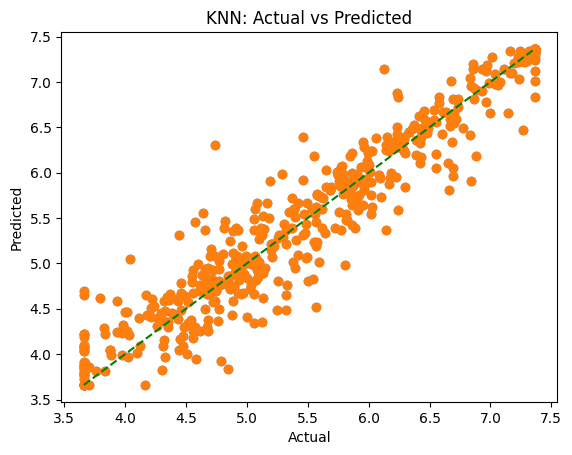

In [100]:
plt.scatter(y_test, y_pred, alpha=0.8)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linestyle='--')
plt.scatter(y_test, y_pred);
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("KNN: Actual vs Predicted")
plt.show()

10.2  Diffrrence between Actual and Predicted values

In [101]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference': y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
1138,5.252193,5.277432,-0.025239
1628,6.552779,6.202876,0.349903
1606,5.548508,5.579361,-0.030853
1977,4.553922,4.672429,-0.118508
1526,6.012740,6.006111,0.006629
...,...,...,...
1403,5.579623,5.765101,-0.185479
808,3.660727,3.869030,-0.208303
65,4.881516,4.436365,0.445151
1451,4.431364,4.386303,0.045061
